# Visualisation et interpretation des données

## Import

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy.linalg import qr_insert
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

Récupération des données

In [139]:
data_reservations = pd.read_csv("Hotel Reservations.csv")
data_reservations

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,INN29995,2,0,0,2,Meal Plan 1,0,Room_Type 1,322,2018,12,9,Offline,0,0,0,52.00,0,Not_Canceled
29995,INN29996,2,0,0,3,Meal Plan 1,0,Room_Type 1,91,2018,5,11,Offline,0,0,0,75.00,0,Not_Canceled
29996,INN29997,2,0,0,2,Meal Plan 1,0,Room_Type 1,24,2018,4,21,Online,0,0,0,117.00,0,Canceled
29997,INN29998,1,0,0,2,Meal Plan 1,0,Room_Type 1,266,2018,12,2,Offline,0,0,0,75.00,0,Not_Canceled


Résultat:
- Il y a 29999 lignes.
- Il y a 19 colonnes
- Aucune donnée nulle

Type de données:
- BookinID: Données continues, qualitatives
- no_of_adults: Données continues, quantitatives
- no_of_children: Données continues, quantitatives
- no_of_weekend_nights: Données continues, quantitatives
- no_of_week_nights: Données continues, quantitatives
- type_of_meal_plan: Données finies, qualitatives
- required_car_parking_space: Données finies, qualitatives
- room_type_reserved: Données finies, qualitatives
- lead_time: Données continues, quantitatives
- arrival_year: Données continues, quantitatives
- arrival_month: Données continues, quantitatives
- arrival_date: Données continues, quantitatives

In [140]:
data_reservations.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000,29999.000000
mean,1.845862,0.105037,0.806127,2.202140,0.031301,85.503217,2017.821894,7.428548,15.583819,0.025668,0.022701,0.155139,103.412309,0.620687
std,0.518453,0.403747,0.868561,1.402214,0.174133,86.072456,0.382608,3.064046,8.723316,0.158144,0.353166,1.771725,35.043692,0.787359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.500000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


## Nettoyage des données

In [141]:
# Agrégation des données
#enfant + adults = nb personne
data_reservations['nb_persons'] = data_reservations['no_of_children'] + data_reservations['no_of_adults']
#nuit de semaine + nuit de week end = nb personne
data_reservations['nb_nights'] = data_reservations['no_of_week_nights'] + data_reservations['no_of_weekend_nights']
#demande special + demande parking =  demande special
data_reservations['no_of_special_requests'] = data_reservations['no_of_special_requests'] + data_reservations['required_car_parking_space']

### Correlations des objets

On traite les correlations des objets avant de faire nos one hots


In [142]:
#one hots
enc = OneHotEncoder(drop='if_binary')

one_hot = np.array(enc.fit_transform(data_reservations[[ 'room_type_reserved', 'market_segment_type', 'booking_status']]).toarray())
one_hot_label = enc.get_feature_names_out(['room_type_reserved', 'market_segment_type', 'booking_status'])

df = pd.DataFrame(data=one_hot, columns=one_hot_label)
data_reservations = data_reservations.join(df)
data_reservations = data_reservations.drop(['room_type_reserved', 'market_segment_type', 'booking_status'], axis=1)

In [143]:

# Suppression des données inutiles
clean_data_reservations = data_reservations.drop(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'arrival_year', 'no_of_weekend_nights', 'required_car_parking_space', 'type_of_meal_plan'], axis=1)


### Nettoyage des anomalies

300 lignes supprimées


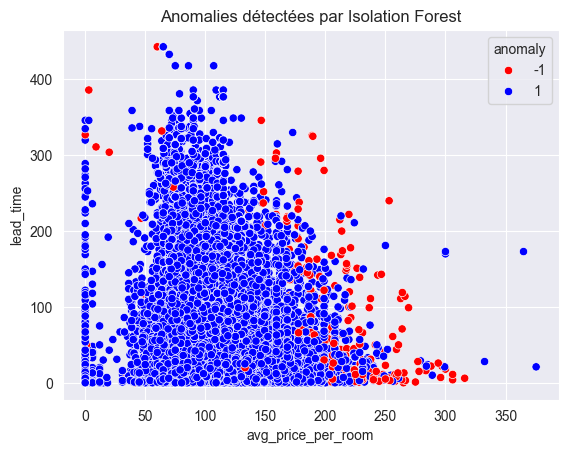

,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,nb_persons,nb_nights,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,224,10,2,0,0,0,65.00,0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,11,6,0,0,0,106.68,1,2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,2,28,0,0,0,60.00,0,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,211,5,20,0,0,0,100.00,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,48,4,11,0,0,0,94.50,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,322,12,9,0,0,0,52.00,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29995,91,5,11,0,0,0,75.00,0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29996,24,4,21,0,0,0,117.00,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,266,12,2,0,0,0,75.00,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [144]:
# 1. Choix de plusieurs features
X = clean_data_reservations[[
    'avg_price_per_room',
    'lead_time',
    'no_of_special_requests',
    'nb_persons',
    'arrival_month',
    'nb_nights'
]]

# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Isolation Forest (moins agressif)
iso = IsolationForest(
    contamination=0.01,
    n_estimators=300,
    max_samples='auto',
    random_state=42,
    bootstrap=False
)
iso.fit(X_scaled)

# 4. Ajouter les prédictions
clean_data_reservations['anomaly'] = iso.predict(X_scaled)

# 5. Comptage
nb_removed = (clean_data_reservations['anomaly'] == -1).sum()
print(nb_removed, "lignes supprimées")


sns.scatterplot(
    data=clean_data_reservations,
    x='avg_price_per_room',
    y='lead_time',
    hue='anomaly',
    palette={1: 'blue', -1: 'red'}
)

plt.title("Anomalies détectées par Isolation Forest")
plt.show()

# 6. Filtrer
clean_data_reservations = clean_data_reservations[clean_data_reservations['anomaly'] == 1]
clean_data_reservations = clean_data_reservations.drop(columns=['anomaly'])
clean_data_reservations

Résultat du nettoyage

In [145]:
clean_data_reservations

,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,nb_persons,nb_nights,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,224,10,2,0,0,0,65.00,0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,11,6,0,0,0,106.68,1,2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,2,28,0,0,0,60.00,0,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,211,5,20,0,0,0,100.00,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,48,4,11,0,0,0,94.50,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,322,12,9,0,0,0,52.00,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29995,91,5,11,0,0,0,75.00,0,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29996,24,4,21,0,0,0,117.00,0,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,266,12,2,0,0,0,75.00,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## Recherche de corrélation entre les attributs

## Statistique de base: % d'annulation

Pourcentage d'annulation : 67.35%


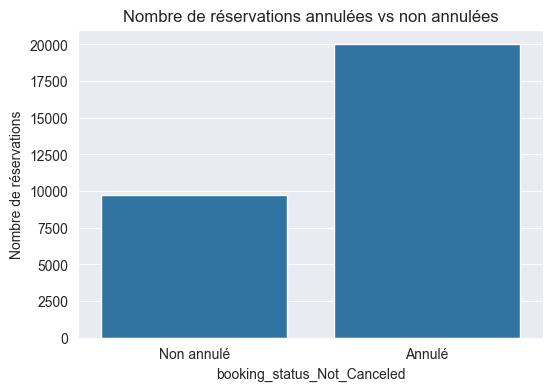

In [146]:
pourcentage_annulation = clean_data_reservations['booking_status_Not_Canceled'].mean() * 100
print(f"Pourcentage d'annulation : {pourcentage_annulation:.2f}%")

# Représentation graphique
plt.figure(figsize=(6,4))
sns.countplot(x='booking_status_Not_Canceled', data=clean_data_reservations)
plt.title('Nombre de réservations annulées vs non annulées')
plt.xticks([0,1], ['Non annulé', 'Annulé'])
plt.ylabel('Nombre de réservations')
plt.show()

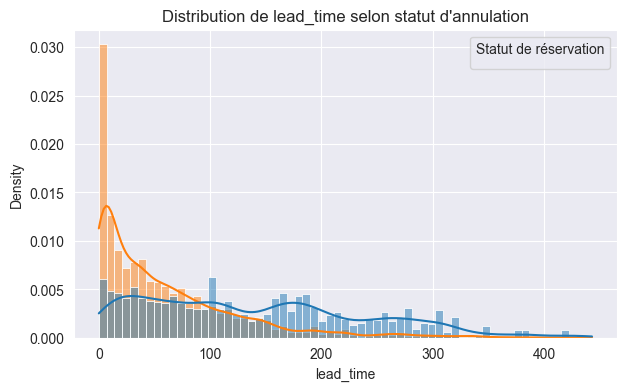

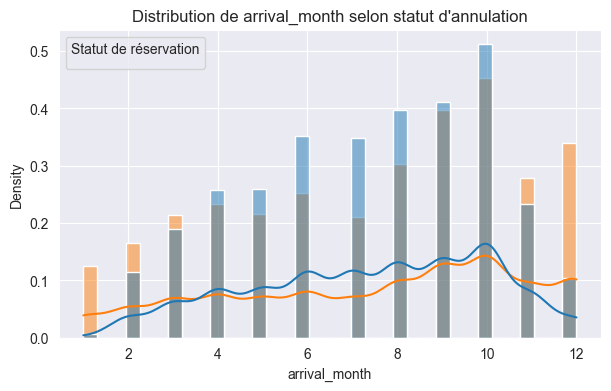

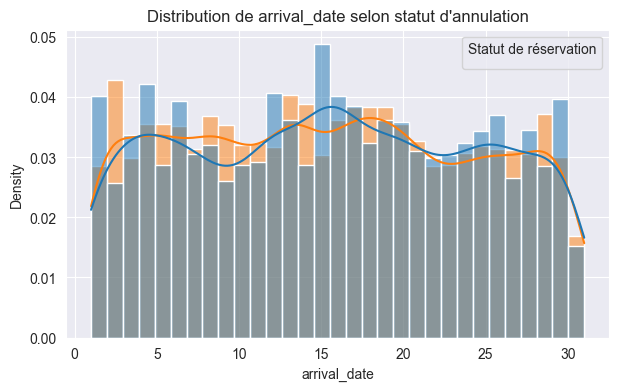

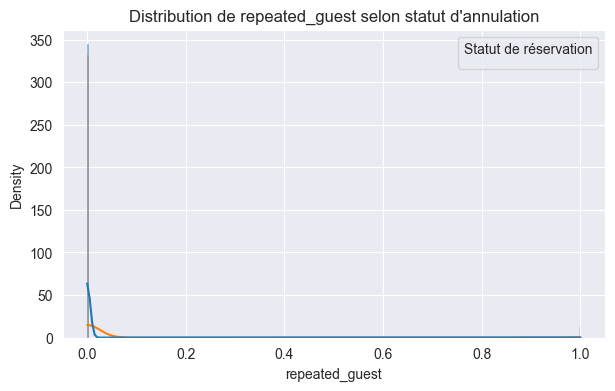

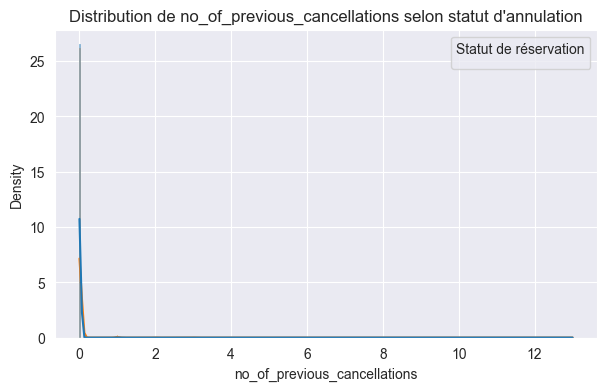

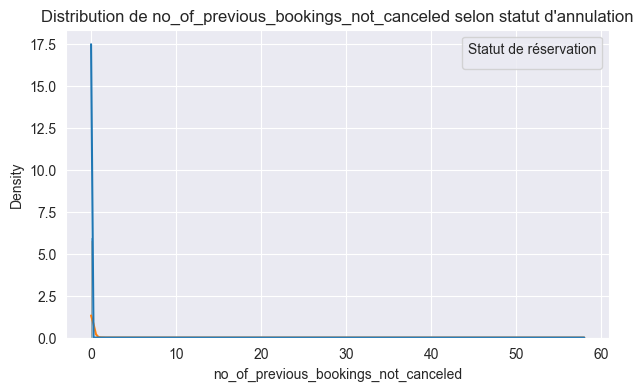

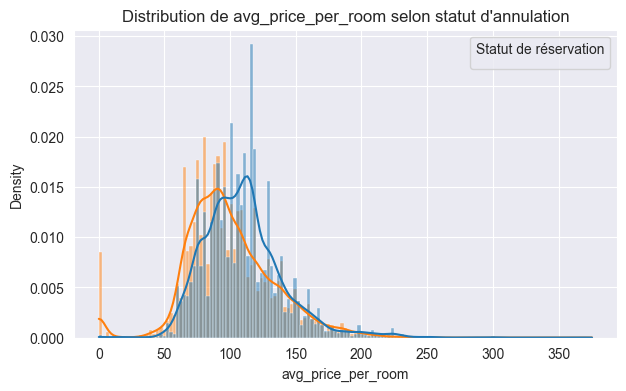

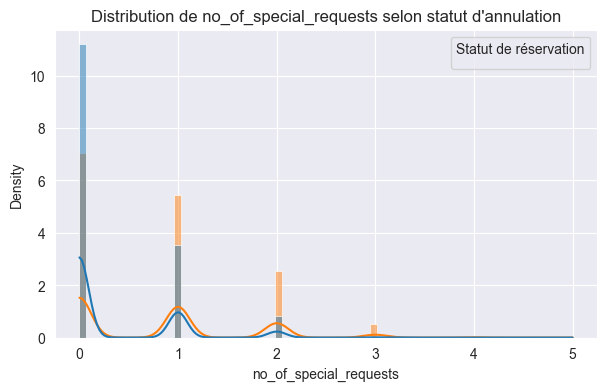

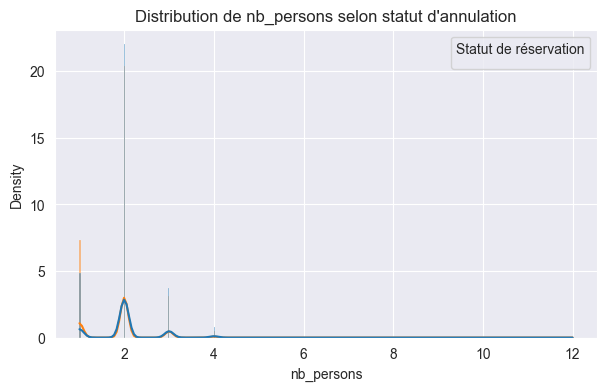

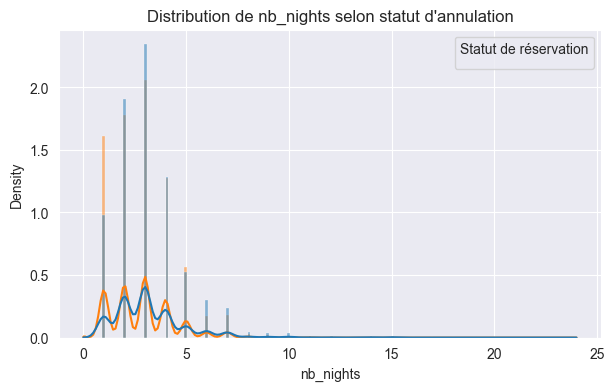

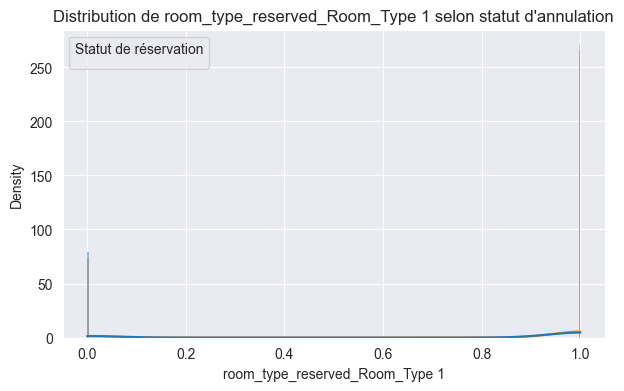

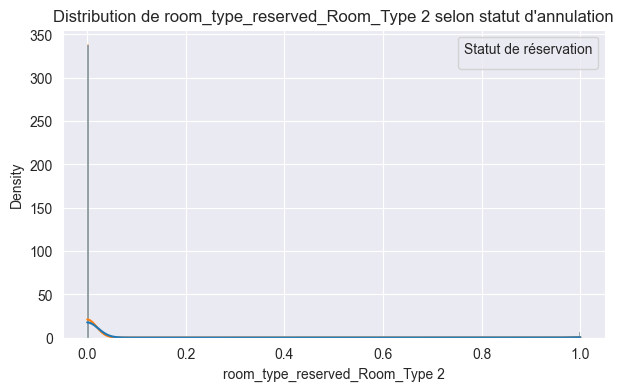

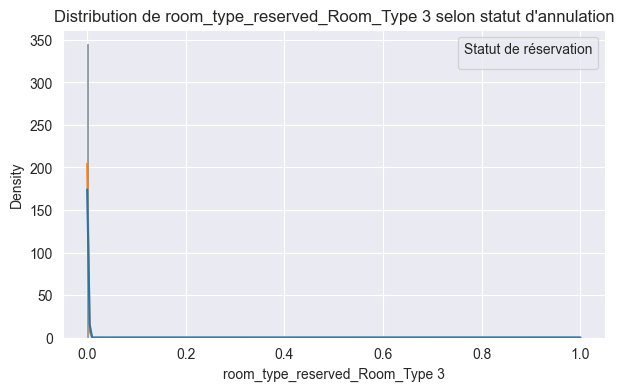

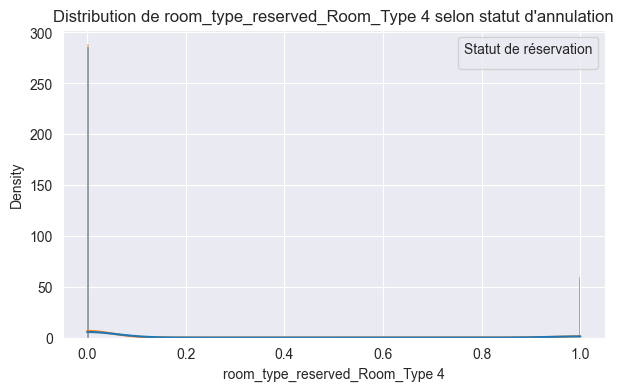

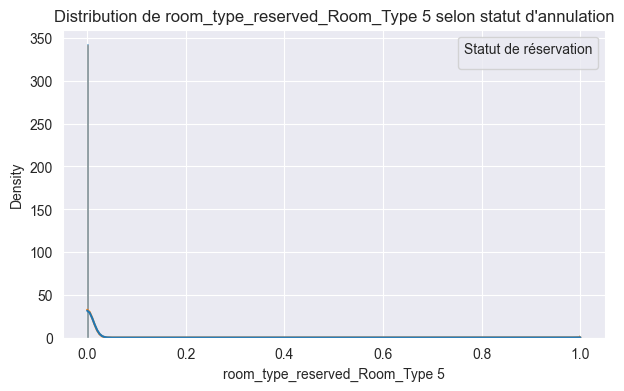

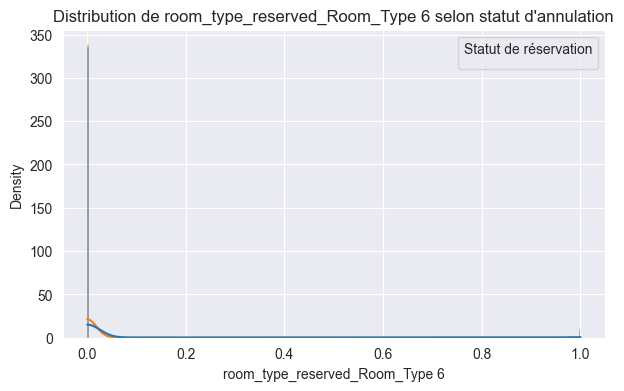

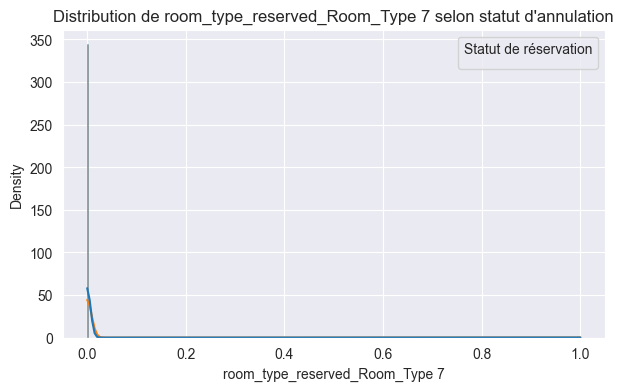

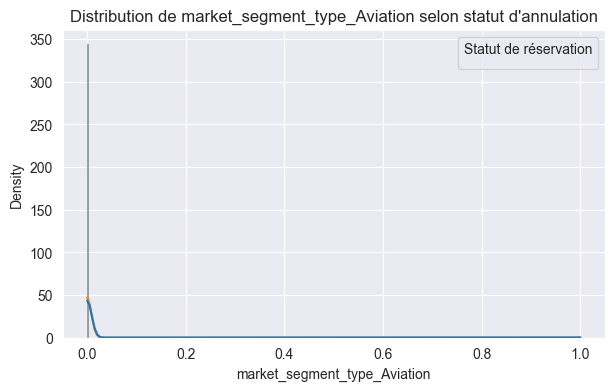

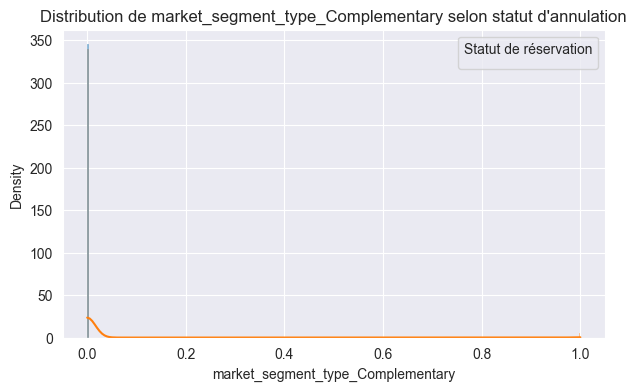

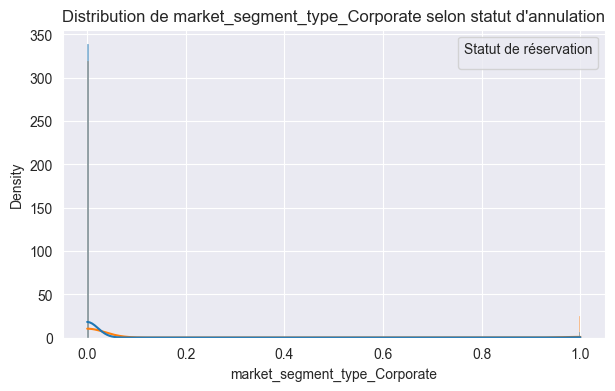

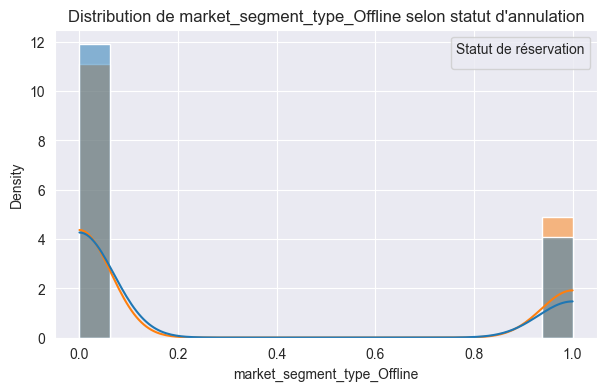

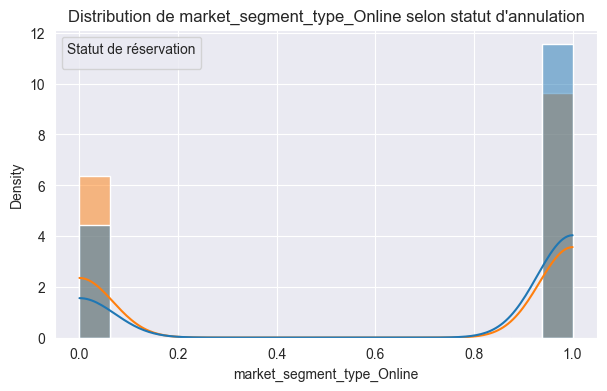

In [147]:
num_cols = clean_data_reservations.select_dtypes(include=['int64', 'float64']).columns.drop('booking_status_Not_Canceled')

for col in num_cols:
    plt.figure(figsize=(7,4))
    ax = sns.histplot(data=clean_data_reservations, x=col, hue='booking_status_Not_Canceled', kde=True, stat="density", common_norm=False)
    plt.title(f"Distribution de {col} selon statut d'annulation")


    handles, labels = ax.get_legend_handles_labels()

    new_labels = ['Annulée' if lab == '0' else 'Non annulée' for lab in labels]

    ax.legend(handles, new_labels, title='Statut de réservation')

    plt.show()




### Recherche globale

<Axes: >

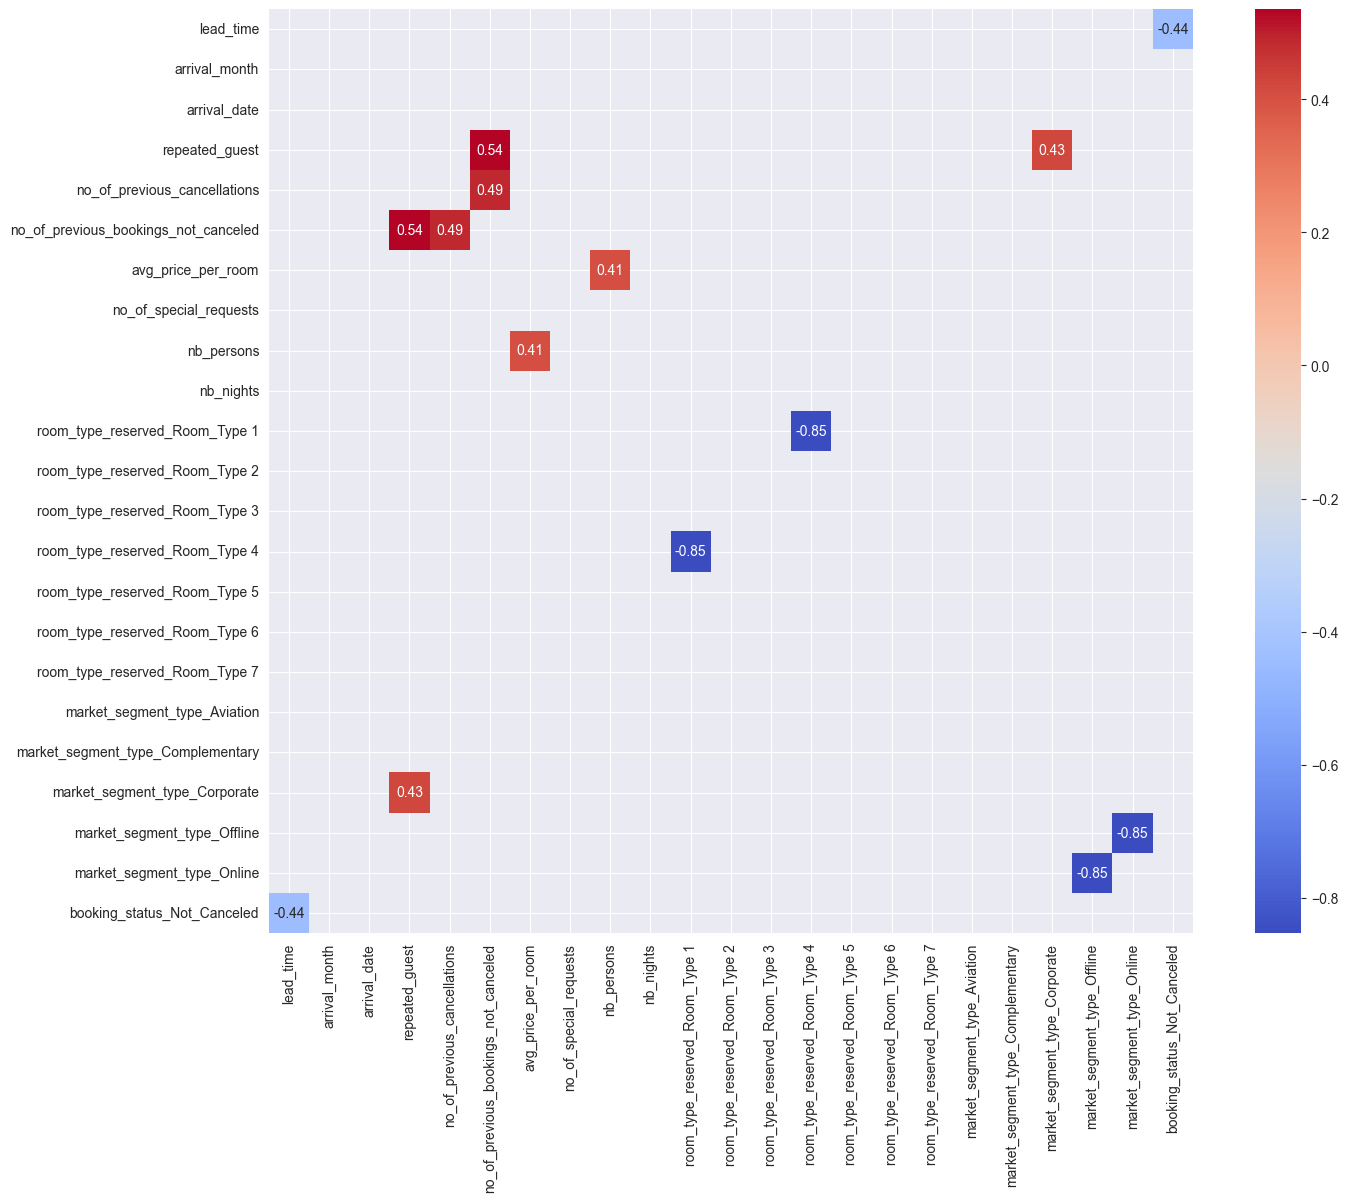

In [148]:
plt.figure(figsize=(16,12))

corr = clean_data_reservations.corr()

#Aucune corrélation parfaite, on retire 1. On estime que haut dessus de 0.5 ou en dessous de -0.5 on a des correlation
corr_filtered = corr.mask((corr < 0.4) & (corr > -0.4) | (corr == 1))
# corr_filtered = corr

sns.heatmap(
    corr_filtered,
    annot=True,           # Affiche les valeurs
    fmt=".2f",            # Formate les nombres
    cmap='coolwarm',      # Couleur
    cbar=True,            # Barre de couleur
    square=True,          # Carré pour chaque case
)

Interpretation:
- Les market segment type corporate ont tendances à etre des clients réguliers
- Les clients réguliers ont tendances à ne pas annuler

### Correlation entre le type de chambre et l'annulation

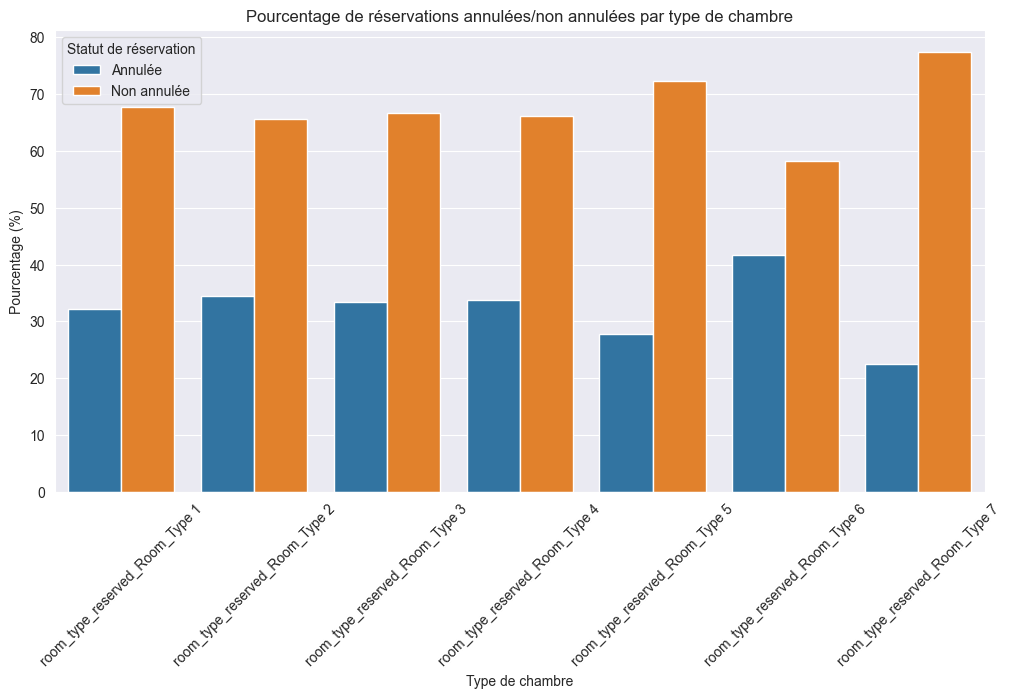

In [149]:
data_cleaned_chambre = data_reservations[
    [
        "room_type_reserved_Room_Type 1",
        "room_type_reserved_Room_Type 2",
        "room_type_reserved_Room_Type 3",
        "room_type_reserved_Room_Type 4",
        "room_type_reserved_Room_Type 5",
        "room_type_reserved_Room_Type 6",
        "room_type_reserved_Room_Type 7",
        "booking_status_Not_Canceled"
    ]
]

# Transformer le dataframe pour avoir une colonne 'type_de_chambre'
melted = data_cleaned_chambre.melt(
    id_vars='booking_status_Not_Canceled',
    var_name='type_de_chambre',
    value_name='reserved'
)

# Garder uniquement les lignes où la chambre a été réservée (reserved == 1)
melted = melted[melted['reserved'] == 1]

# Calculer le pourcentage d'annulations / non annulations par type de chambre
percent_df = (
    melted.groupby(['type_de_chambre', 'booking_status_Not_Canceled'])
    .size()
    .reset_index(name='count')
)
percent_df['percentage'] = percent_df.groupby('type_de_chambre')['count'].transform(lambda x: x / x.sum() * 100)
# Tracer le graphique
plt.figure(figsize=(12,6))
ax =sns.barplot(
    data=percent_df,
    x='type_de_chambre',
    y='percentage',
    hue='booking_status_Not_Canceled'
)
plt.ylabel("Pourcentage (%)")
plt.xlabel("Type de chambre")
plt.title("Pourcentage de réservations annulées/non annulées par type de chambre")


handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')
plt.xticks(rotation=45)
plt.show()

Interpretation:
- Seulement la chambre de type 7 est moins annulée
- Seulement la chambre de type 6 est plus annulée
- Aucun écart significatif pour être pris en compte

## Correlation entre date et annulation

### Mois/annulation

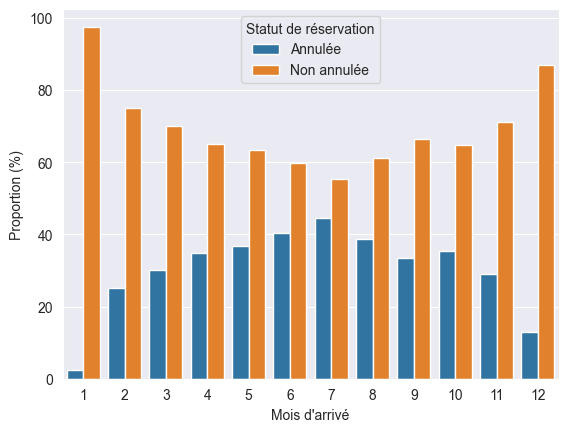

In [150]:
# sns.histplot(clean_data_reservations, x='arrival_month', hue='booking_status_Not_Canceled',multiple="dodge")
#
# plt.legend(title='Statut de réservation', labels=['Annulée', 'Non annulée'])

df = clean_data_reservations.copy()
df_grouped = df.groupby(['arrival_month', 'booking_status_Not_Canceled']).size().reset_index(name='count')

df_total = df_grouped.groupby('arrival_month')['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

ax = sns.barplot(
    data=df_grouped,
    x='arrival_month',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.xlabel('Mois d\'arrivé')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')
plt.show()

Interpretation:
- Il y a très peu d'annulation en janvier et décembre
- Il y a plus d'annulation sur la periode juin/juillet

### Jour/annulation

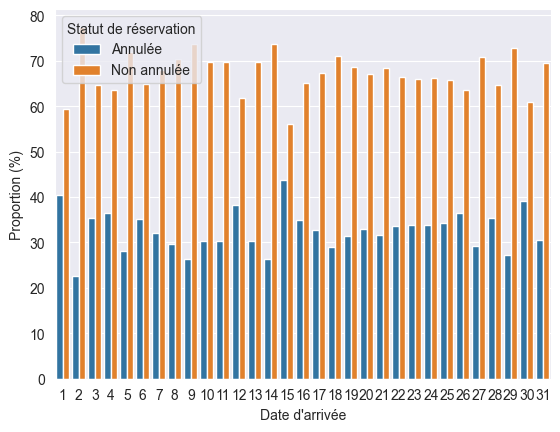

In [151]:
df = clean_data_reservations.copy()
df_grouped = df.groupby(['arrival_date', 'booking_status_Not_Canceled']).size().reset_index(name='count')

df_total = df_grouped.groupby('arrival_date')['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

ax = sns.barplot(
    data=df_grouped,
    x='arrival_date',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.xlabel('Date d\'arrivée')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')
plt.show()

Interpretation:
- Aucune tendance ne se dessine

## Correlation prix/annulation

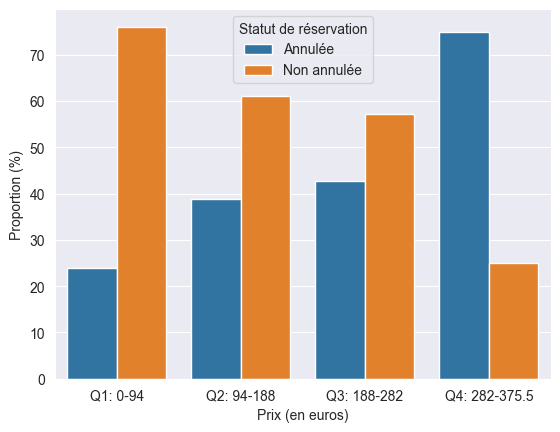

In [152]:
df = clean_data_reservations.copy()
quart_price = clean_data_reservations['avg_price_per_room'].max() / 4

# Créer des bins pour le lead_time
bins = [0, quart_price, quart_price*2, quart_price*3, quart_price*4]  # tu peux ajuster les intervalles
labels = [f'Q1: 0-{round(quart_price*1)}', f'Q2: {round(quart_price*1)}-{round(quart_price*2)}', f'Q3: {round(quart_price*2)}-{round(quart_price*3)}', f'Q4: {round(quart_price*3)}-{quart_price*4}']
df['avg_price_per_room_bin'] = pd.cut(df['avg_price_per_room'], bins=bins, labels=labels, right=False)

# Grouper par bins et statut de réservation
df_grouped = df.groupby(['avg_price_per_room_bin', 'booking_status_Not_Canceled'], observed=False).size().reset_index(name='count')

# Calculer la proportion
df_total = df_grouped.groupby('avg_price_per_room_bin', observed=False)['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

# Graphique
ax =sns.barplot(
    data=df_grouped,
    x='avg_price_per_room_bin',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.xlabel('Prix (en euros)')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')

plt.show()

On remarque une tendance a l'annulation sur la tranche Q3 mais nous manquons de données pour effectuer une causalité

## Réservation en avance/annulation

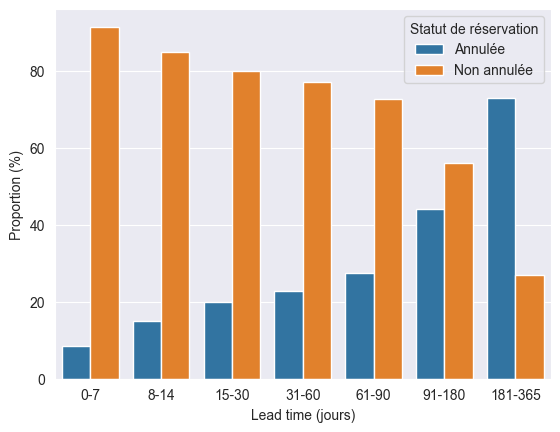

In [153]:
df = clean_data_reservations.copy()

# Créer des bins pour le lead_time
bins = [0, 7, 14, 30, 60, 90, 180, 365]  # tu peux ajuster les intervalles
labels = ['0-7', '8-14', '15-30', '31-60', '61-90', '91-180', '181-365']
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Grouper par bins et statut de réservation
df_grouped = df.groupby(['lead_time_bin', 'booking_status_Not_Canceled'], observed=False).size().reset_index(name='count')

# Calculer la proportion
df_total = df_grouped.groupby('lead_time_bin', observed=False)['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

# Graphique
ax =sns.barplot(
    data=df_grouped,
    x='lead_time_bin',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.xlabel('Lead time (jours)')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')

plt.show()

Interpretations:
- On remarque que les gens qui ont reservé en avance ont plus tendances à annuler

## Service supplémentaire/Annulation

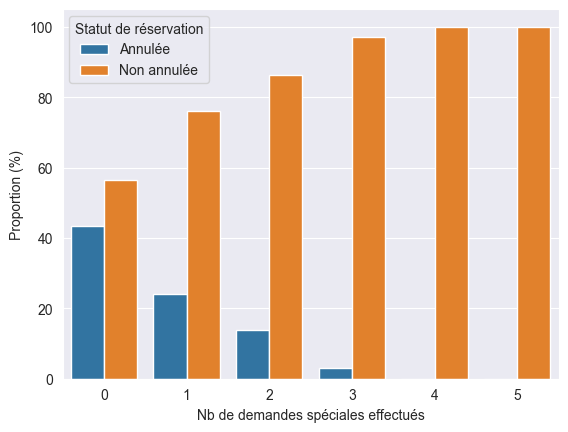

In [154]:
df = clean_data_reservations.copy()

# Créer des bins pour le lead_time
bins = [0, 1, 2, 3, 4, 5, 6]  # tu peux ajuster les intervalles
labels = ['0', '1', '2', '3', '4', '5']
df['no_of_special_requests_bin'] = pd.cut(df['no_of_special_requests'], bins=bins, labels=labels, right=False)

# Grouper par bins et statut de réservation
df_grouped = df.groupby(['no_of_special_requests_bin', 'booking_status_Not_Canceled'], observed=False).size().reset_index(name='count')

# Calculer la proportion
df_total = df_grouped.groupby('no_of_special_requests_bin', observed=False)['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

# Graphique
ax =sns.barplot(
    data=df_grouped,
    x='no_of_special_requests_bin',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.xlabel('Nb de demandes spéciales effectués')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')

plt.show()

Interpretations:
- On remarque que plus les gens font des demandes particulières moins ils ont tendances à annuler.

## Nombre de personne/annulation

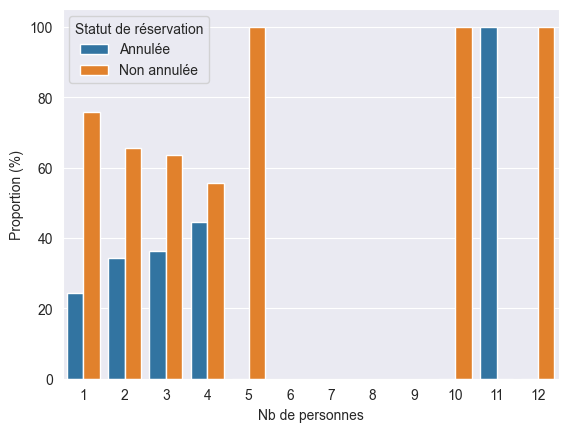

In [155]:
df = clean_data_reservations.copy()
##min max 0 12
# Créer des bins pour le lead_time
bins = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12, 13]  # tu peux ajuster les intervalles
labels = [ '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11' ,'12']
df['nb_persons_bin'] = pd.cut(df['nb_persons'], bins=bins, labels=labels, right=False)

# Grouper par bins et statut de réservation
df_grouped = df.groupby(['nb_persons_bin', 'booking_status_Not_Canceled'], observed=False).size().reset_index(name='count')

# Calculer la proportion
df_total = df_grouped.groupby('nb_persons_bin', observed=False)['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

# Graphique
ax =sns.barplot(
    data=df_grouped,
    x='nb_persons_bin',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.xlabel('Nb de personnes')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')

plt.show()

Interpretations:
- Aucun lien ne peut etre établi
- Présence d'anomalie

## Durée du séjour/annulation

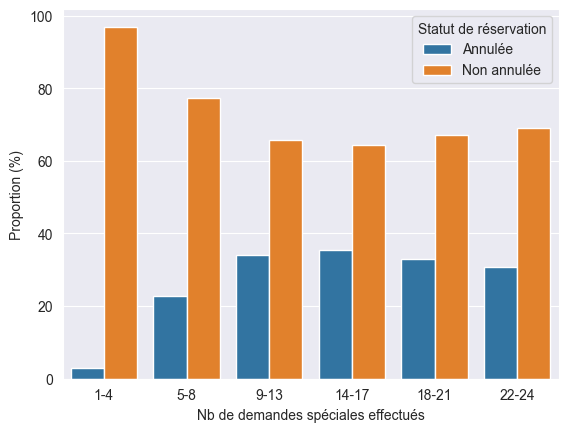

In [156]:
df = clean_data_reservations.copy()
##min max 0 24
# Créer des bins pour le lead_time
bins = [0, 1, 2, 3, 4, 5, 6]  # tu peux ajuster les intervalles
labels = ['1-4', '5-8', '9-13', '14-17', '18-21', '22-24']
df['nb_nights_bin'] = pd.cut(df['nb_nights'], bins=bins, labels=labels, right=False)

# Grouper par bins et statut de réservation
df_grouped = df.groupby(['nb_nights_bin', 'booking_status_Not_Canceled'], observed=False).size().reset_index(name='count')

# Calculer la proportion
df_total = df_grouped.groupby('nb_nights_bin', observed=False)['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

# Graphique
ax =sns.barplot(
    data=df_grouped,
    x='nb_nights_bin',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.xlabel('Nb de demandes spéciales effectués')
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')

plt.show()

Interpretations:
- Les séjours de 1 a 4 jours ont moins tendances à être annulés

## Distributions des annulations par typologie de clients

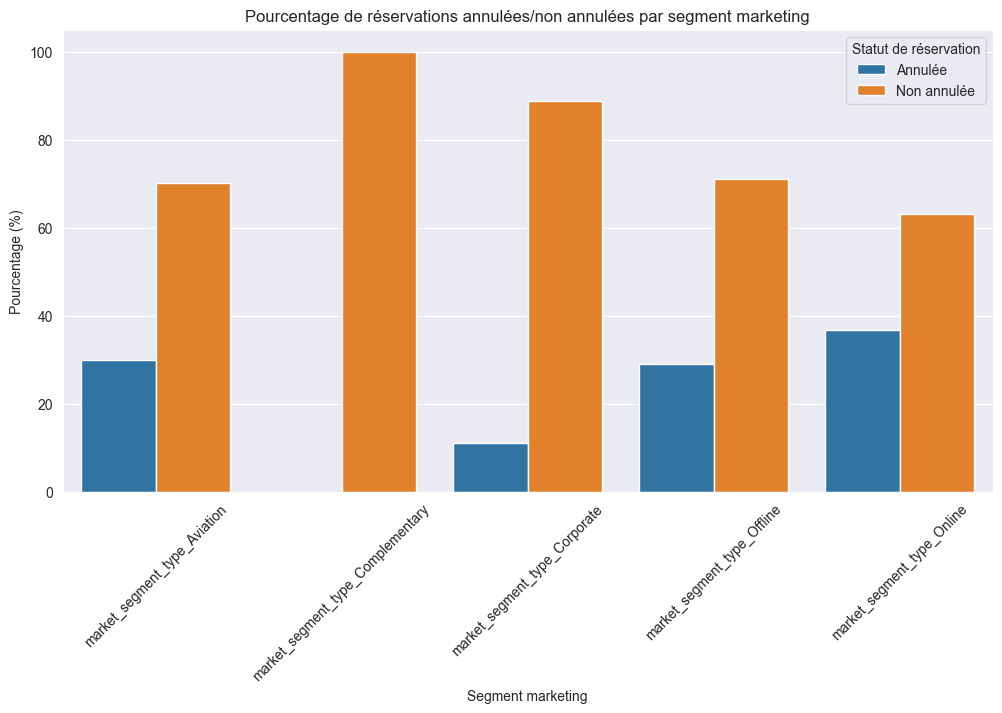

In [157]:
data_cleaned_chambre = data_reservations[
    [
        'market_segment_type_Aviation',
        'market_segment_type_Complementary',
        'market_segment_type_Corporate',
        'market_segment_type_Offline',
        'market_segment_type_Online',
        "booking_status_Not_Canceled"
    ]
]

# Transformer le dataframe pour avoir une colonne 'type_de_chambre'
melted = data_cleaned_chambre.melt(
    id_vars='booking_status_Not_Canceled',
    var_name='segment_marketing',
    value_name='reserved'
)

# Garder uniquement les lignes où la chambre a été réservée (reserved == 1)
melted = melted[melted['reserved'] == 1]

# Calculer le pourcentage d'annulations / non annulations par type de chambre
percent_df = (
    melted.groupby(['segment_marketing', 'booking_status_Not_Canceled'])
    .size()
    .reset_index(name='count')
)
percent_df['percentage'] = percent_df.groupby('segment_marketing')['count'].transform(lambda x: x / x.sum() * 100)
# Tracer le graphique
plt.figure(figsize=(12,6))
ax =sns.barplot(
    data=percent_df,
    x='segment_marketing',
    y='percentage',
    hue='booking_status_Not_Canceled'
)
plt.ylabel("Pourcentage (%)")
plt.xlabel("Segment marketing")
plt.title("Pourcentage de réservations annulées/non annulées par segment marketing")


handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')
plt.xticks(rotation=45)
plt.show()

Interpretation:
- On peut remarquer que le type online a une plus forte tendance a annuler
- On peut remarque que le type complementary n'annule pas


## Client régulier/annulation

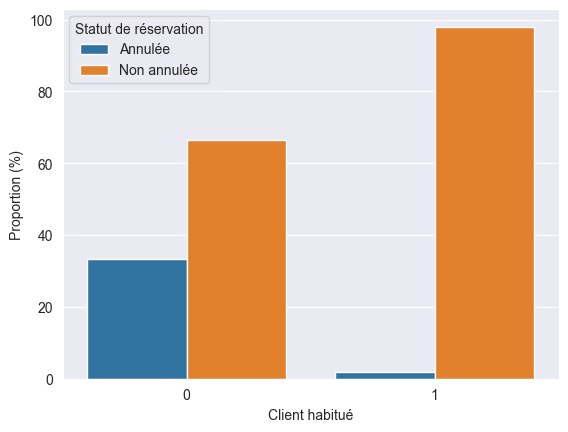

In [158]:
df = clean_data_reservations.copy()
df_grouped = df.groupby(['repeated_guest', 'booking_status_Not_Canceled']).size().reset_index(name='count')

df_total = df_grouped.groupby('repeated_guest')['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

ax = sns.barplot(
    data=df_grouped,
    x='repeated_guest',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.xlabel('Client habitué')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')
plt.show()

Interpretation:
- Les clients habitués on plus tendances a ne pas annuler

### Nombre d'annulation

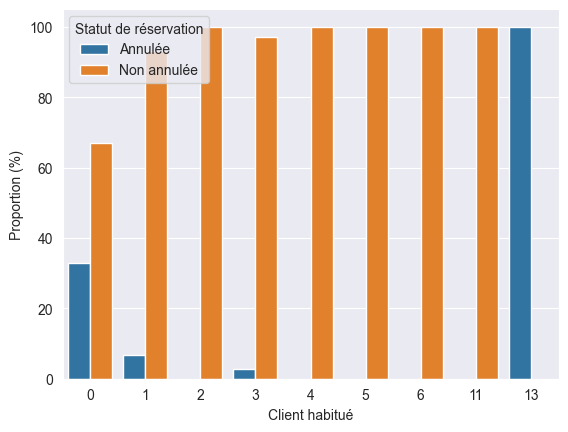

In [159]:
df = clean_data_reservations.copy()
df_grouped = df.groupby(['no_of_previous_cancellations', 'booking_status_Not_Canceled']).size().reset_index(name='count')

df_total = df_grouped.groupby('no_of_previous_cancellations')['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

ax = sns.barplot(
    data=df_grouped,
    x='no_of_previous_cancellations',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.xlabel('Client habitué')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')
plt.show()

Interpretations:
- Aucune correlation particulières

### Nb de non annulation

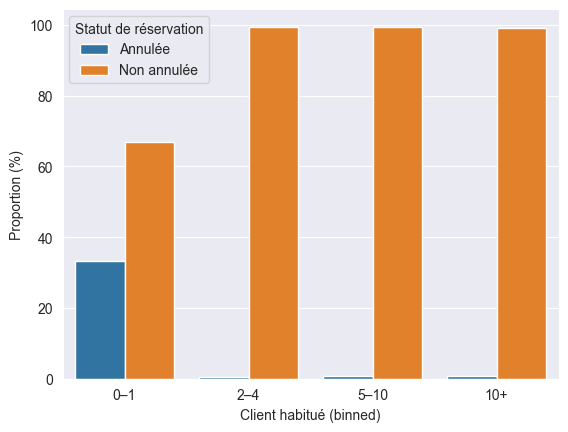

In [160]:
df = clean_data_reservations.copy()

# ---- 1. Définir les bins ----
bins = [0, 1, 4, 10, df['no_of_previous_bookings_not_canceled'].max()]
labels = ['0–1', '2–4', '5–10', '10+']

df['booking_bin'] = pd.cut(
    df['no_of_previous_bookings_not_canceled'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# ---- 2. Regroupement par classes créées ----
df_grouped = (
    df.groupby(['booking_bin', 'booking_status_Not_Canceled'], observed=False)
      .size()
      .reset_index(name='count')
)

# ---- 3. Calcul des proportions ----
df_total = df_grouped.groupby('booking_bin', observed=False)['count'].transform('sum')
df_grouped['proportion'] = df_grouped['count'] / df_total * 100

# ---- 4. Barplot ----
ax = sns.barplot(
    data=df_grouped,
    x='booking_bin',
    y='proportion',
    hue='booking_status_Not_Canceled'
)

plt.ylabel('Proportion (%)')
plt.xlabel('Client habitué (binned)')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Annulée', 'Non annulée'], title='Statut de réservation')

plt.show()

Interpretation:
- Les données ne permettent pas de représenter une tendance

## Résumé des corrélations

Corrélations établies:
-

- Mois
- prix
- avance
- service supplémentaire
- durée de séjour (a retravailler)
- typologie de client
- client habitué

# Normalisation des données et detections des anomalies

In [161]:
# Supprimer arrival_date, no_of_previous_cancellations, no_of_previous_bookings_not_canceled
# Suppression des données inutiles
clean_data_reservations = clean_data_reservations.drop([
    'arrival_date',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'room_type_reserved_Room_Type 1',
    'room_type_reserved_Room_Type 2',
    'room_type_reserved_Room_Type 3',
    'room_type_reserved_Room_Type 4',
    'room_type_reserved_Room_Type 5',
    'room_type_reserved_Room_Type 6',
    'room_type_reserved_Room_Type 7',
], axis=1)


clean_data_reservations



,lead_time,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,nb_persons,nb_nights,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,224,10,0,65.00,0,2,3,0.0,0.0,0.0,1.0,0.0,1.0
1,5,11,0,106.68,1,2,5,0.0,0.0,0.0,0.0,1.0,1.0
2,1,2,0,60.00,0,1,3,0.0,0.0,0.0,0.0,1.0,0.0
3,211,5,0,100.00,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0
4,48,4,0,94.50,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29994,322,12,0,52.00,0,2,2,0.0,0.0,0.0,1.0,0.0,1.0
29995,91,5,0,75.00,0,2,3,0.0,0.0,0.0,1.0,0.0,1.0
29996,24,4,0,117.00,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0
29997,266,12,0,75.00,0,1,2,0.0,0.0,0.0,1.0,0.0,1.0


In [162]:
clean_data_reservations.to_csv('clean_data_unnormalized.csv', index=False)

### Normalisation des données

In [163]:
X = clean_data_reservations.drop(columns=["booking_status_Not_Canceled"])
y = clean_data_reservations["booking_status_Not_Canceled"]



normalize_data = preprocessing.StandardScaler().fit_transform(X)
# normalize_data = preprocessing.MinMaxScaler().fit_transform(X)

clean_data_reservations = pd.DataFrame(normalize_data, columns=X.columns)

clean_data_reservations["booking_status_Not_Canceled"] = y.values


clean_data_reservations



# # Sélectionner les colonnes à normaliser (par exemple toutes sauf la cible)
# cols_to_normalize = ['lead_time', 'arrival_month', 'avg_price_per_room', ]  # ou une liste spécifique, ex: ['feature1','feature2']
#
# # Copier les données à normaliser
# X_normalized = X[cols_to_normalize].copy()
#
# # Appliquer la normalisation
# scaler = MinMaxScaler()
# X_normalized = pd.DataFrame(scaler.fit_transform(X_normalized), columns=cols_to_normalize)
#
# # Reconstituer le DataFrame complet
# clean_data_reservations_norm = X.copy()  # commencer avec toutes les colonnes
# clean_data_reservations_norm[cols_to_normalize] = X_normalized  # remplacer par les colonnes normalisées
# clean_data_reservations_norm["booking_status_Not_Canceled"] = y.values  # ajouter la colonne cible
#
# clean_data_reservations_norm.head()


,lead_time,arrival_month,repeated_guest,avg_price_per_room,no_of_special_requests,nb_persons,nb_nights,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled
0,1.609764,0.839446,-0.161398,-1.125010,-0.794241,0.100908,0.008417,-0.060132,-0.100847,-0.242851,1.568506,-1.338085,1.0
1,-0.937707,1.166097,-0.161398,0.117871,0.442749,0.100908,1.190305,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,1.0
2,-0.984236,-1.773767,-0.161398,-1.274108,-0.794241,-1.492329,0.008417,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0
3,1.458545,-0.793812,-0.161398,-0.081324,-0.794241,0.100908,-0.582528,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0
4,-0.437518,-1.120464,-0.161398,-0.245332,-0.794241,0.100908,-0.582528,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29694,2.749729,1.492749,-0.161398,-1.512665,-0.794241,0.100908,-0.582528,-0.060132,-0.100847,-0.242851,1.568506,-1.338085,1.0
29695,0.062670,-0.793812,-0.161398,-0.826814,-0.794241,0.100908,0.008417,-0.060132,-0.100847,-0.242851,1.568506,-1.338085,1.0
29696,-0.716693,-1.120464,-0.161398,0.425609,-0.794241,0.100908,-0.582528,-0.060132,-0.100847,-0.242851,-0.637549,0.747336,0.0
29697,2.098321,1.492749,-0.161398,-0.826814,-0.794241,-1.492329,-0.582528,-0.060132,-0.100847,-0.242851,1.568506,-1.338085,1.0


## Visualisation globale avec ydata profiling

In [164]:
from ydata_profiling import ProfileReport

profile = ProfileReport(clean_data_reservations, title="Profiling Report", explorative=True)
profile.to_file("rapport.html")
import webbrowser
webbrowser.open_new_tab("rapport.html")
clean_data_reservations.to_csv('clean_data.csv', index=False)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 321.13it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]